In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd /content/drive/MyDrive/paperPlateDetection/yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.5/78.2 GB disk)


In [ ]:
# train model
!python train.py --img 640 --batch 16 --epochs 1000 --data /content/drive/MyDrive/paperPlateDetection/data.yaml --weights yolov5x.pt --cache

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

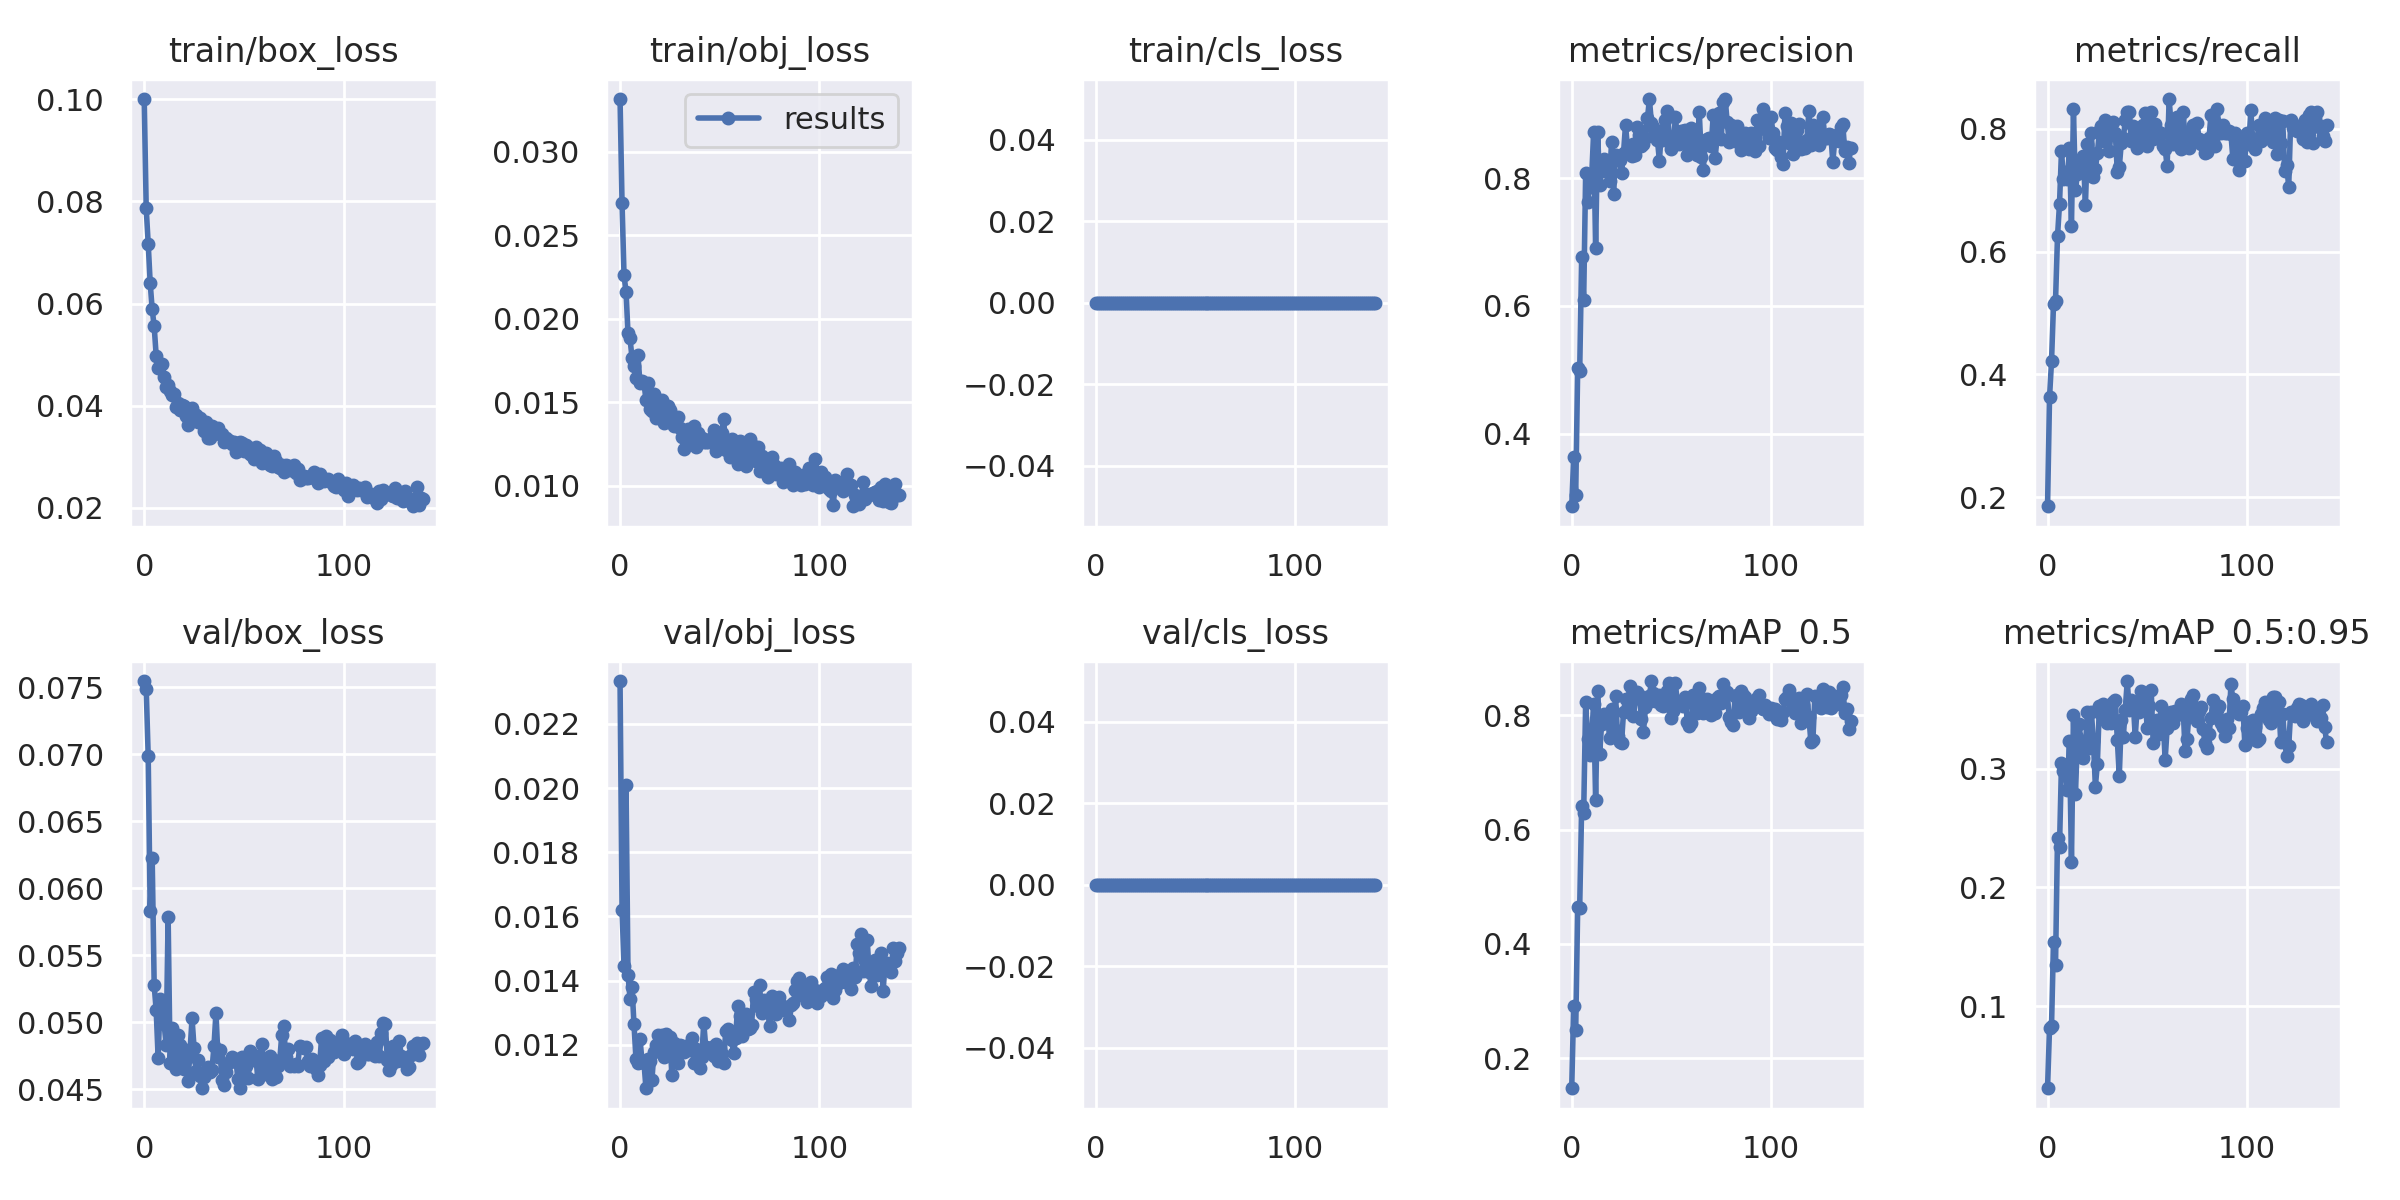

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from IPython.display import Image, clear_output  # to display images
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp2/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


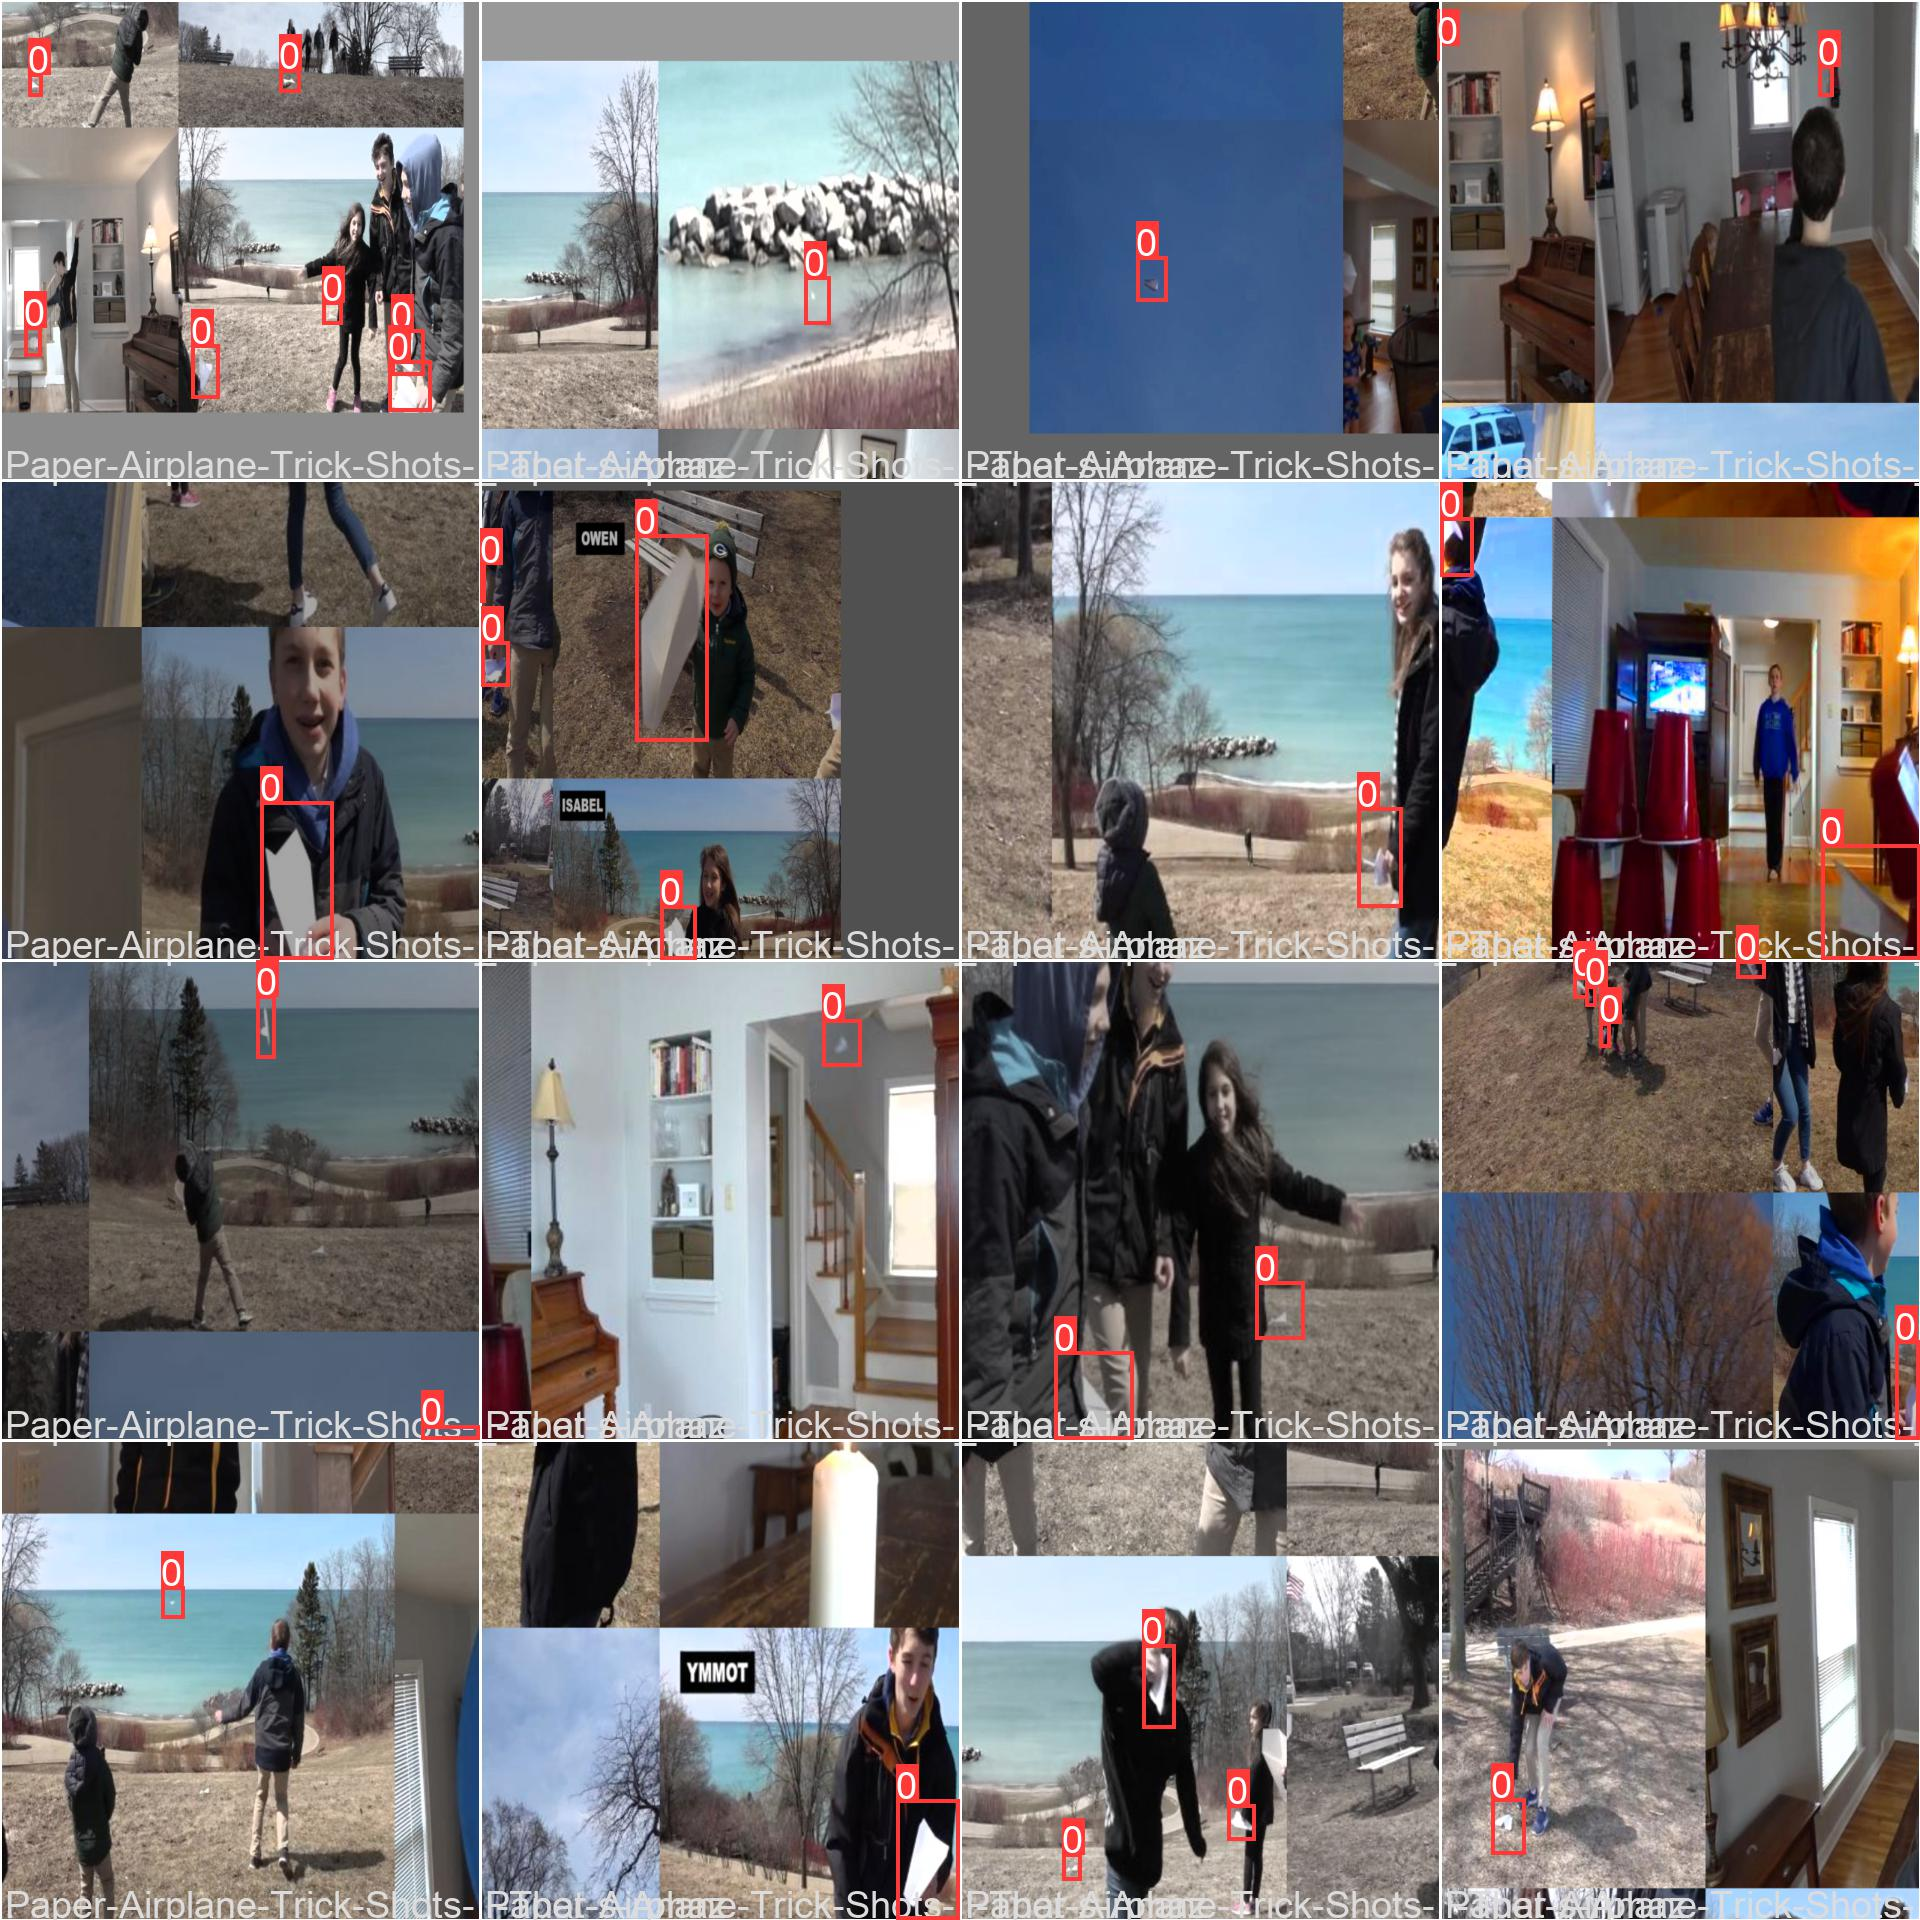

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp2/train_batch2.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


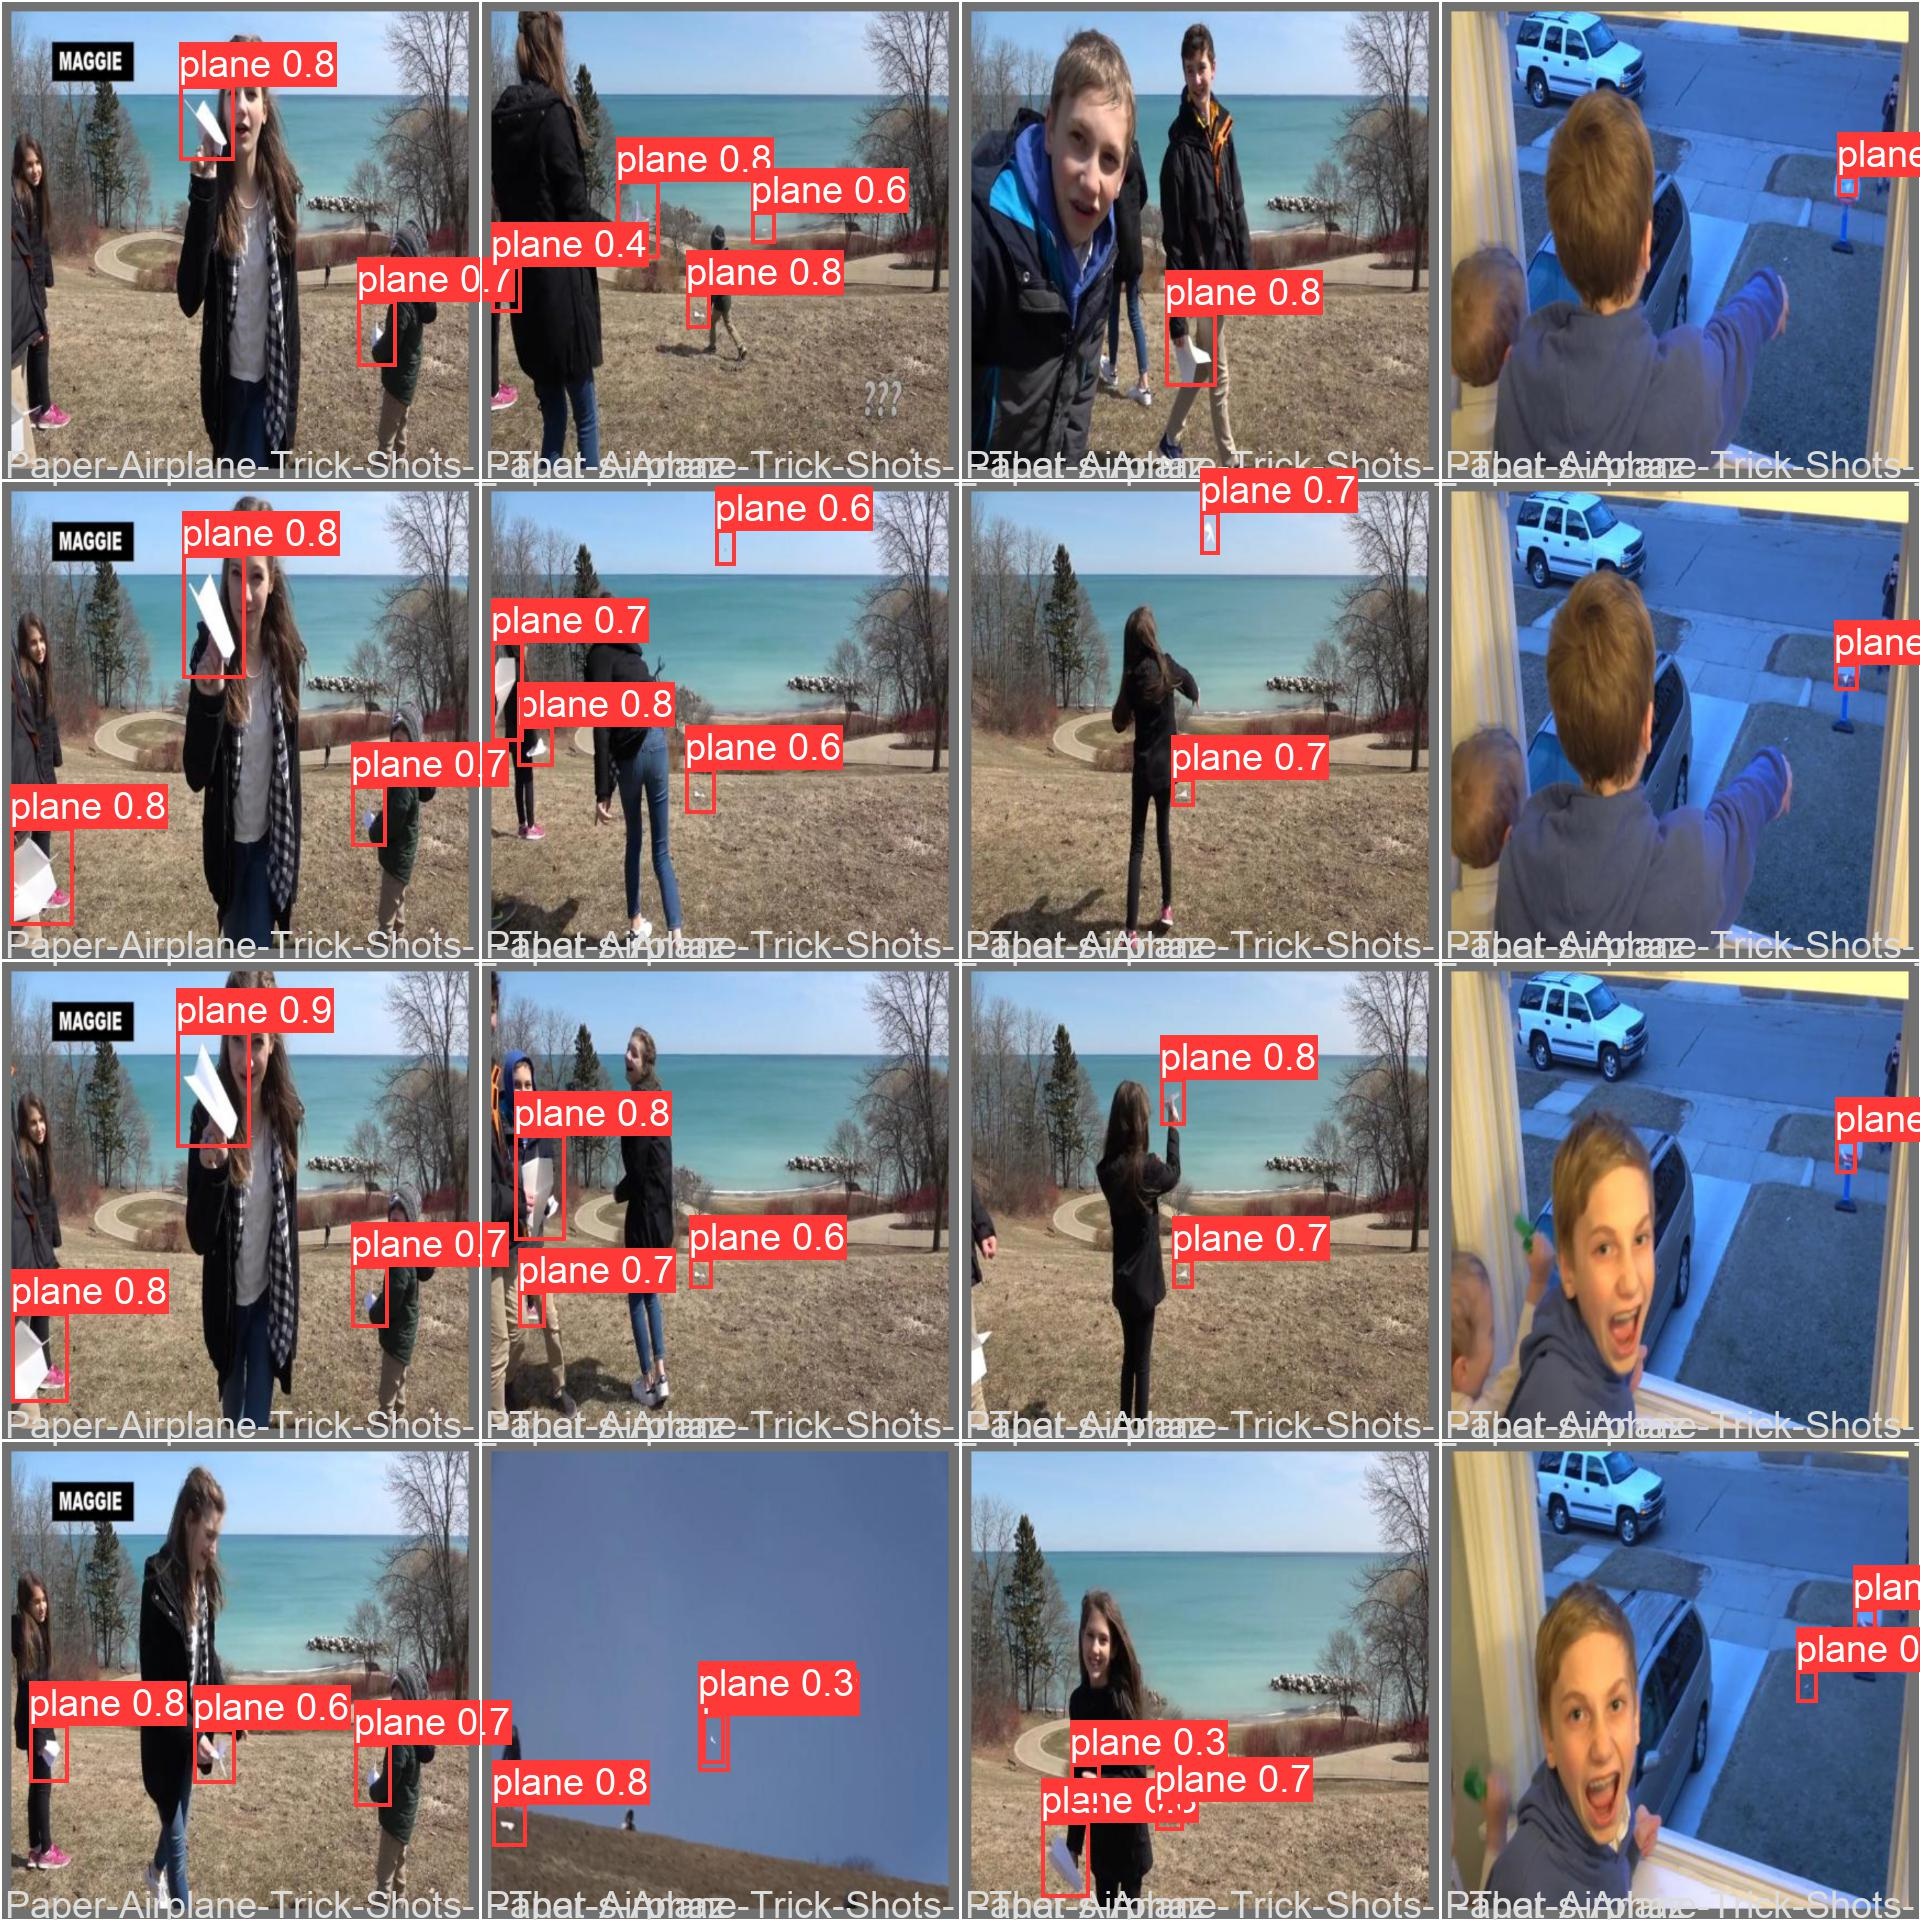

In [ ]:
# print out an validated example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp2/val_batch2_pred.jpg', width=900)

In [ ]:
# !python train.py --img 640 --batch 16 --epochs 1000 --data /content/drive/MyDrive/paperPlateDetection/data.yaml --weights yolov5x.pt --cache
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/paperPlateDetection/test/images

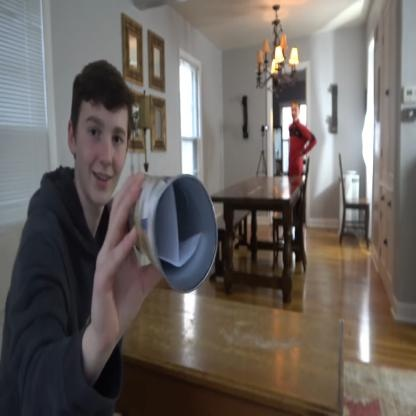

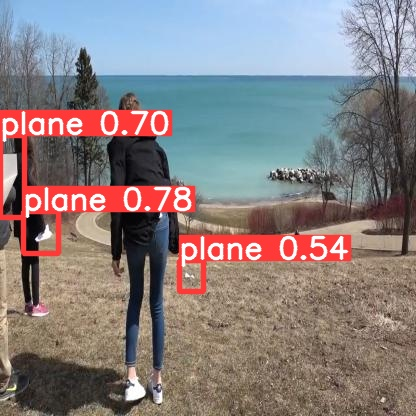

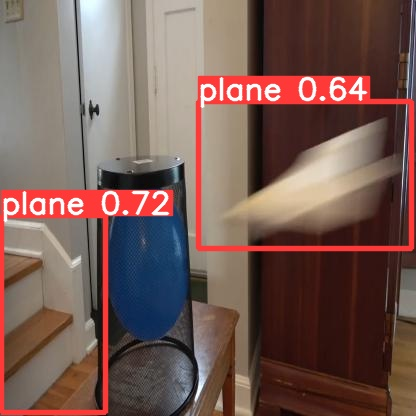

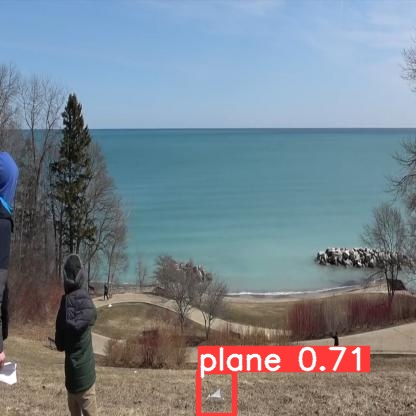

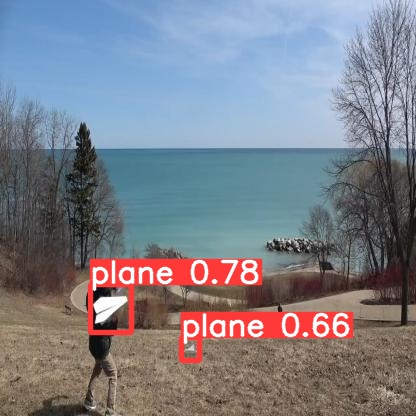

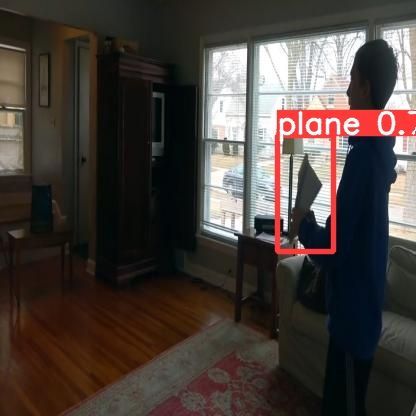

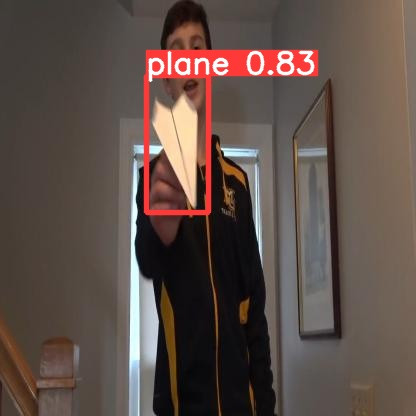

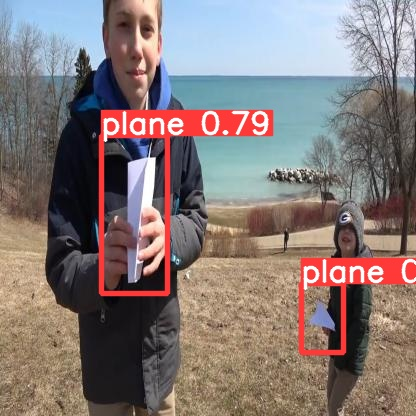

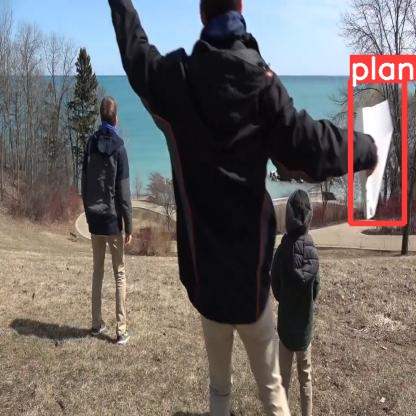

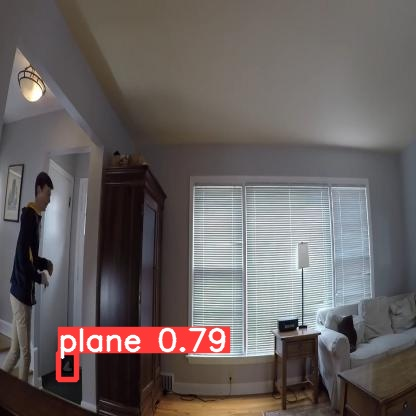

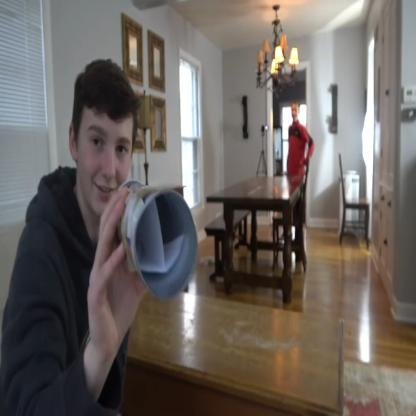

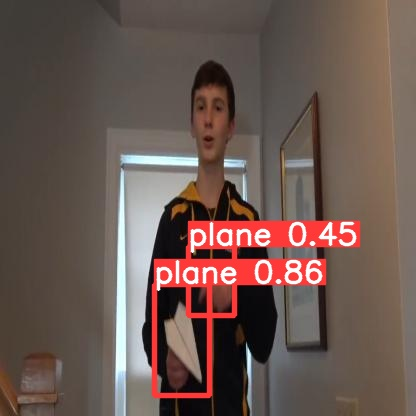

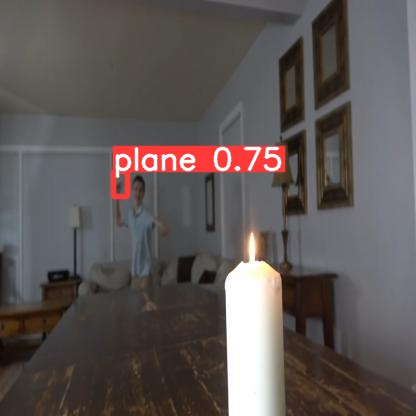

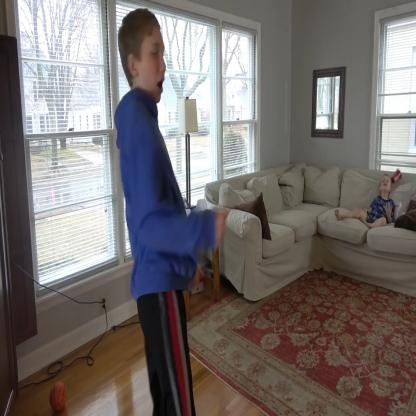

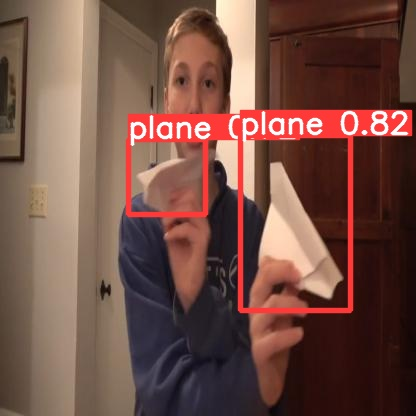

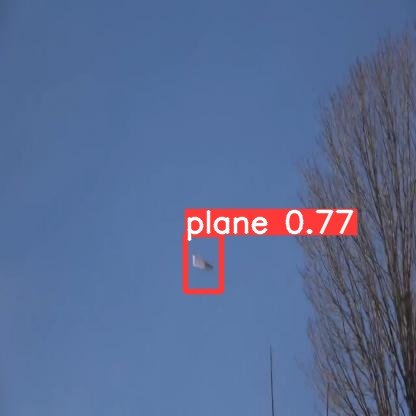

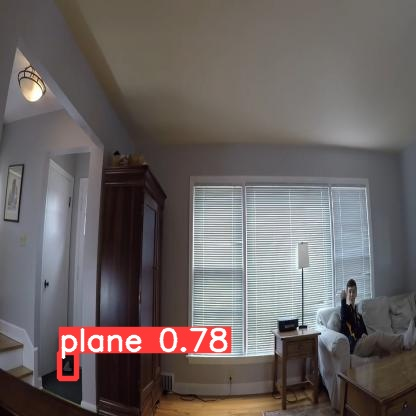

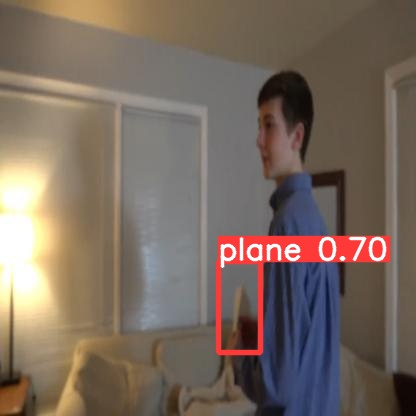

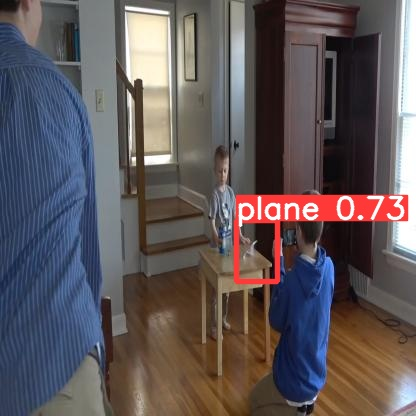

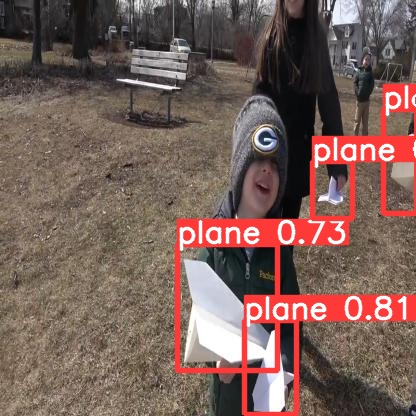

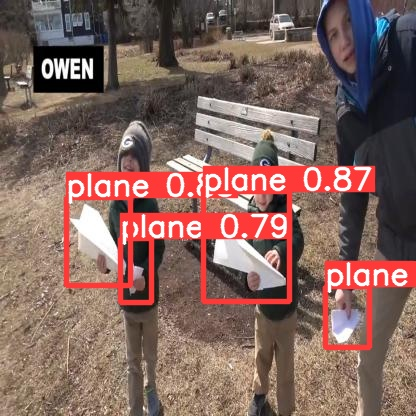

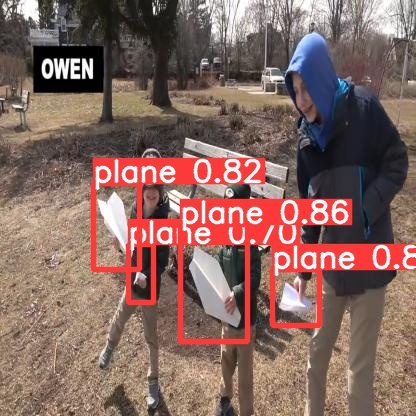

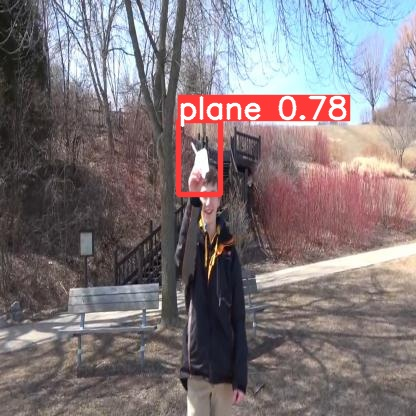

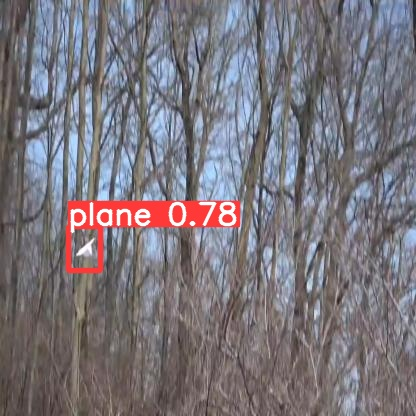

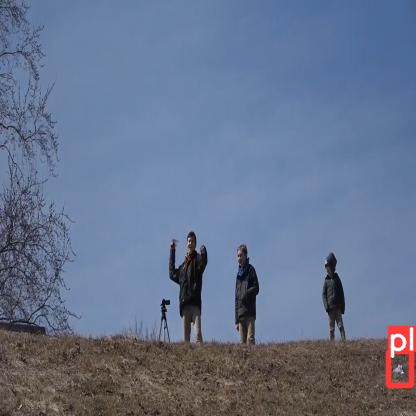

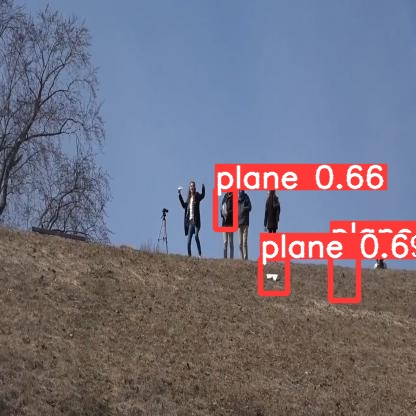

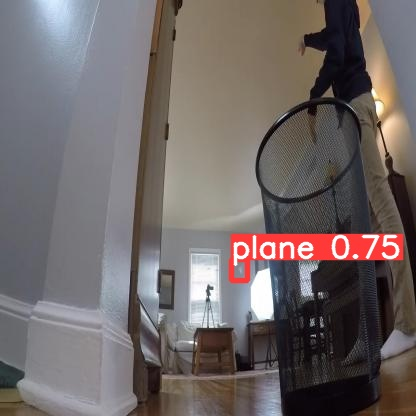

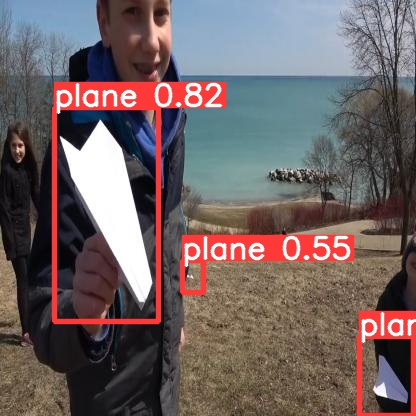

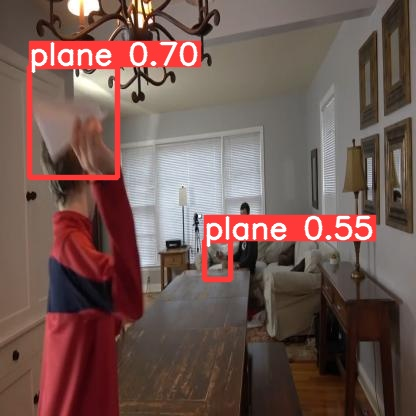

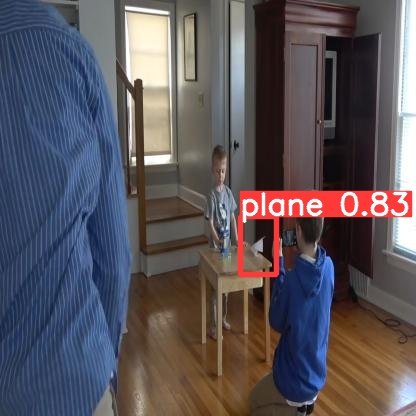

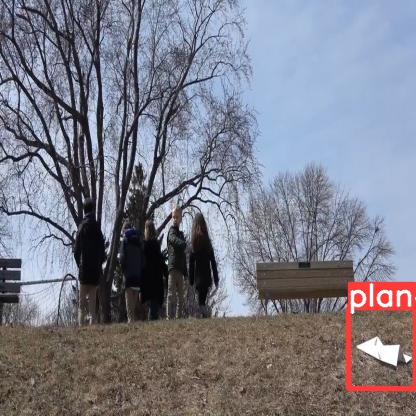

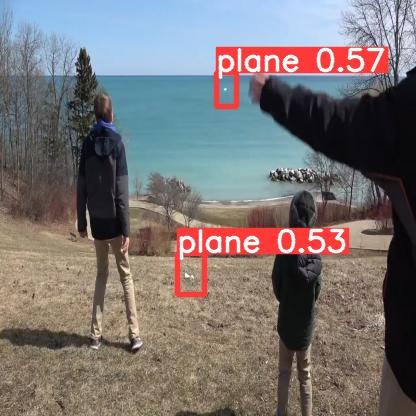

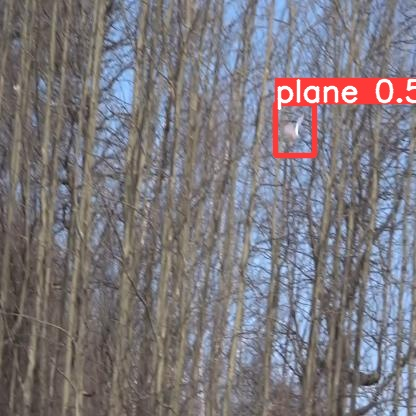

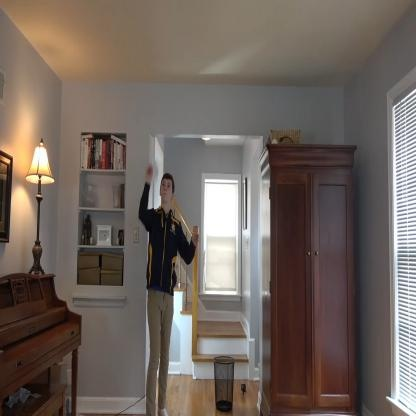

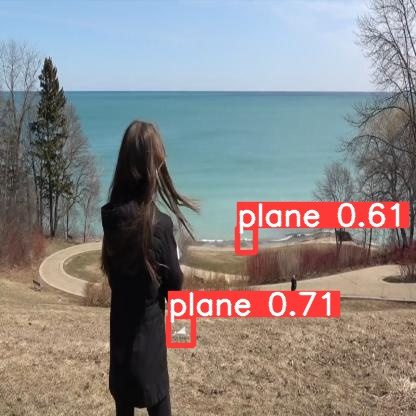

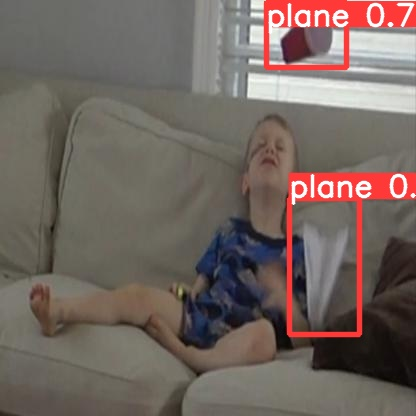

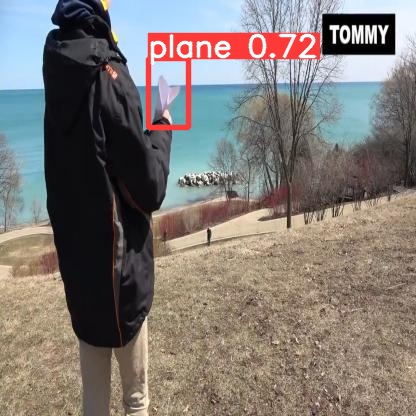

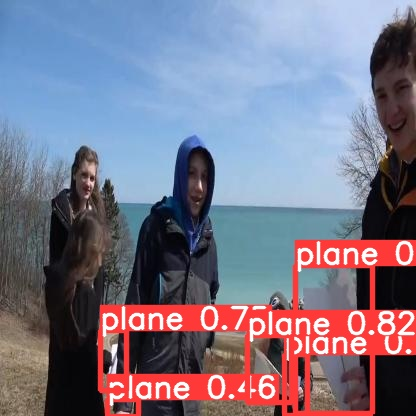

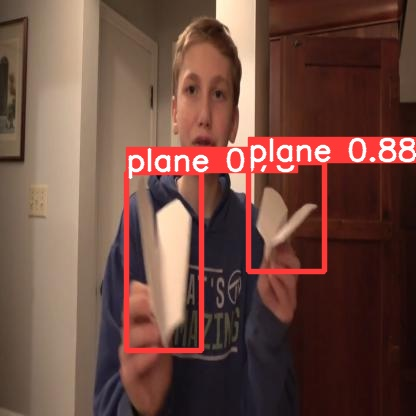

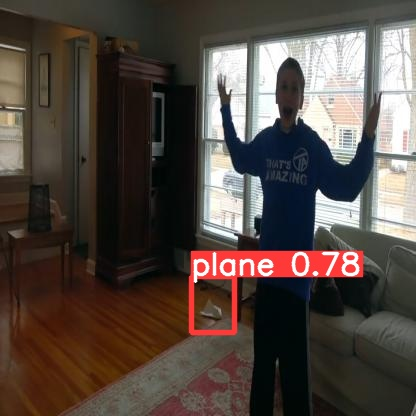

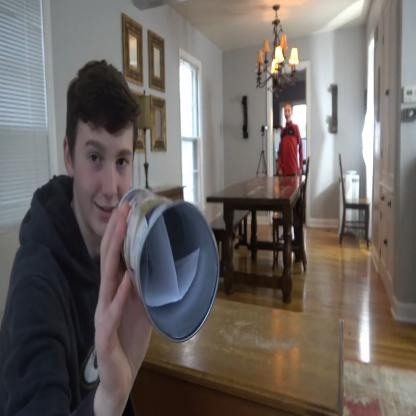

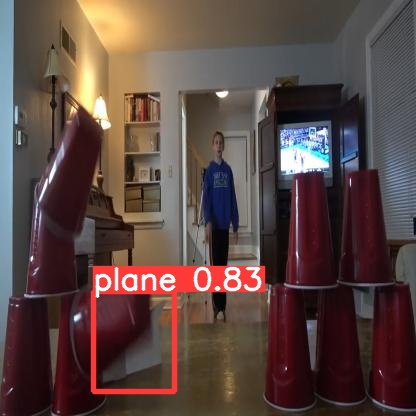

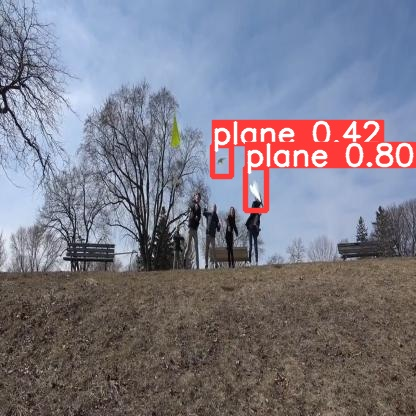

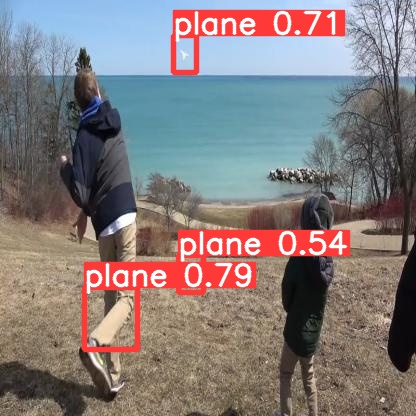

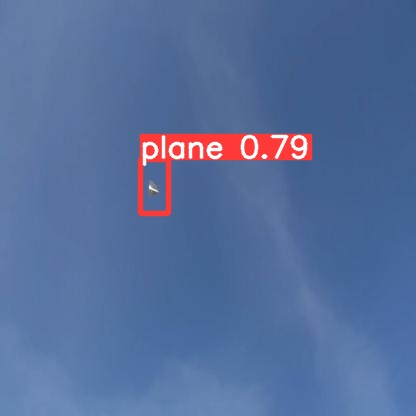

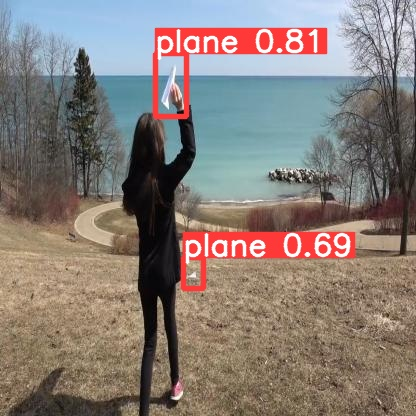

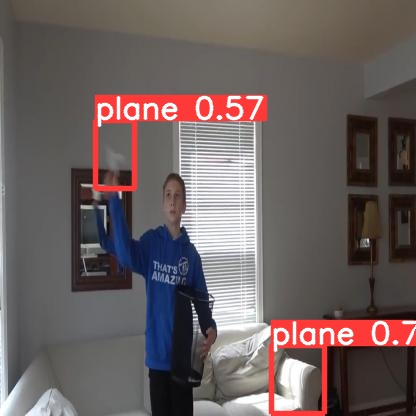

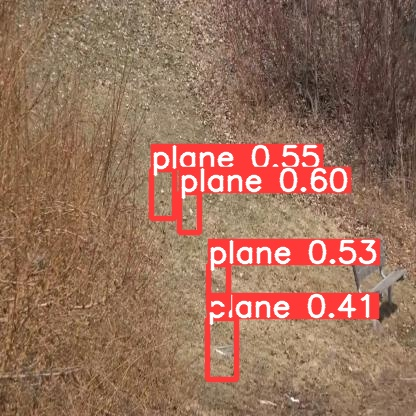

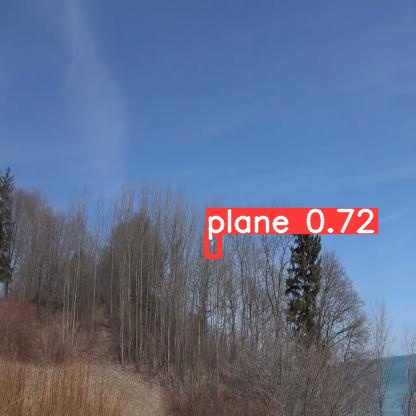

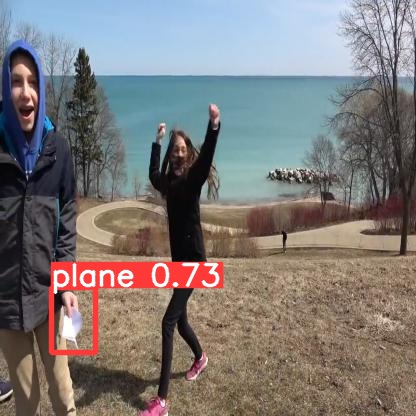

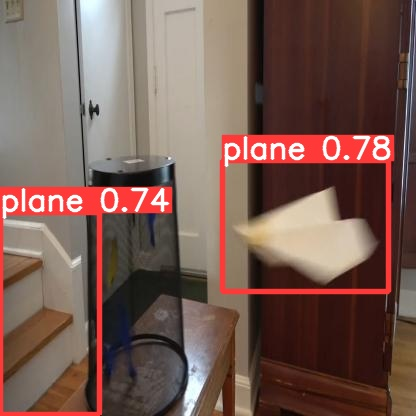

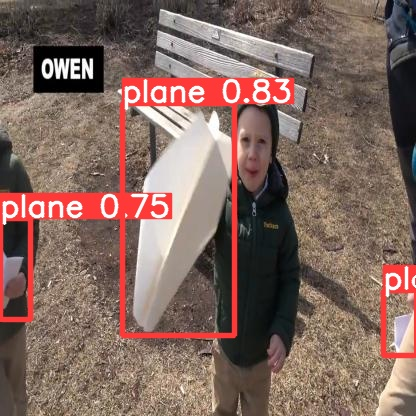

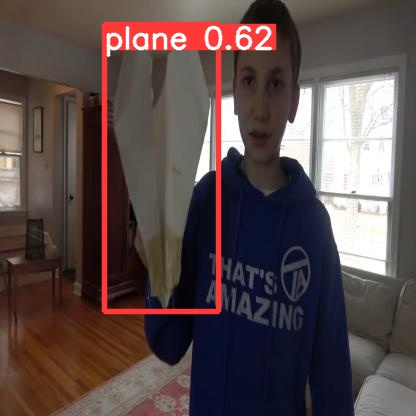

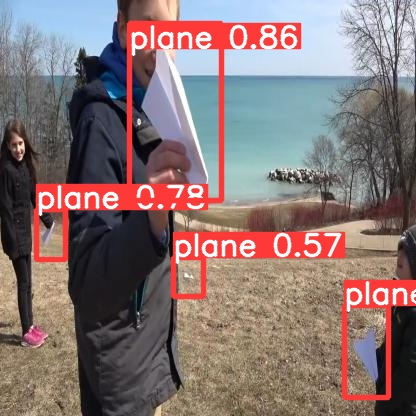

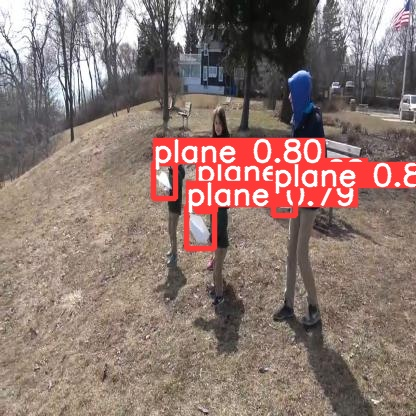

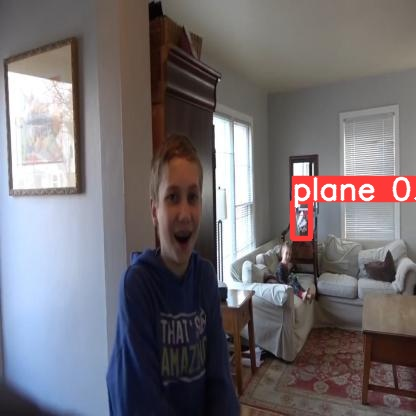

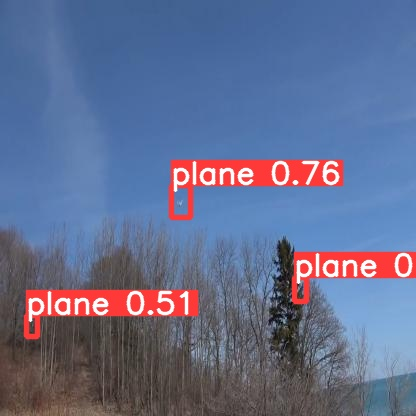

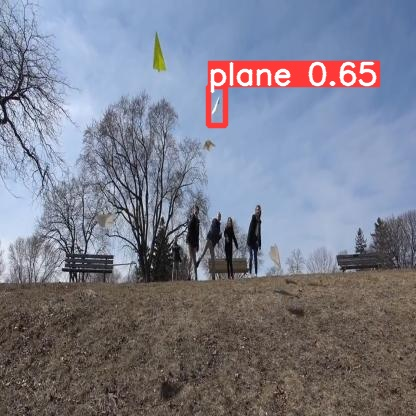

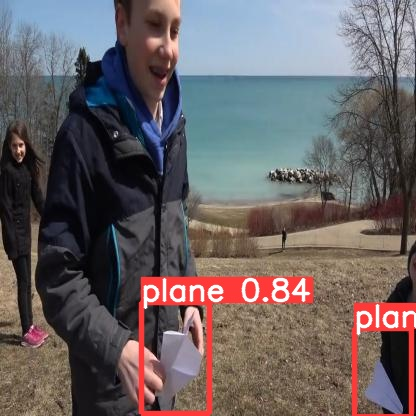

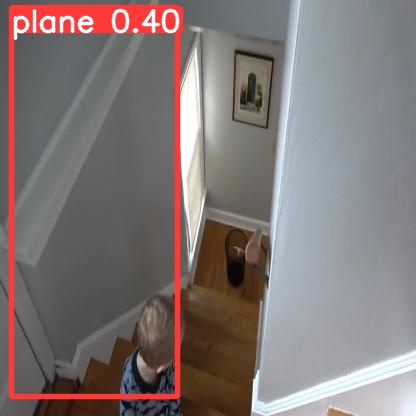

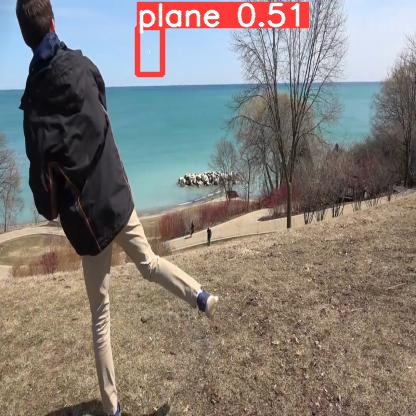

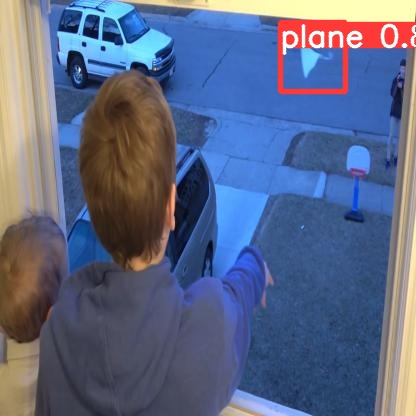

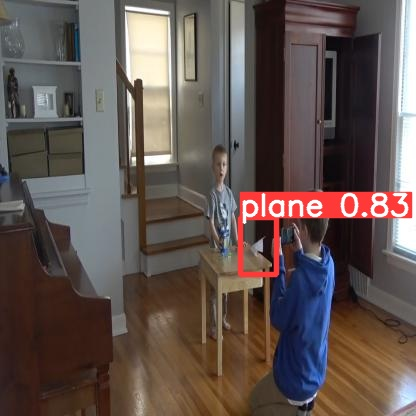

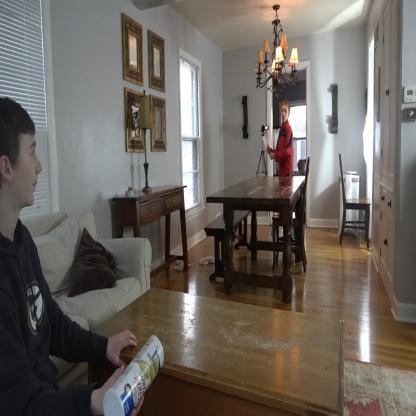

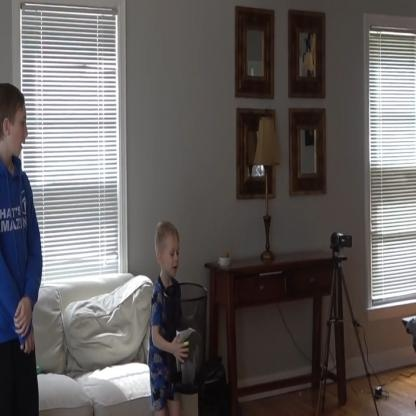

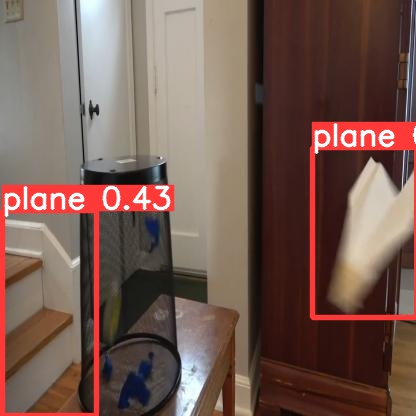

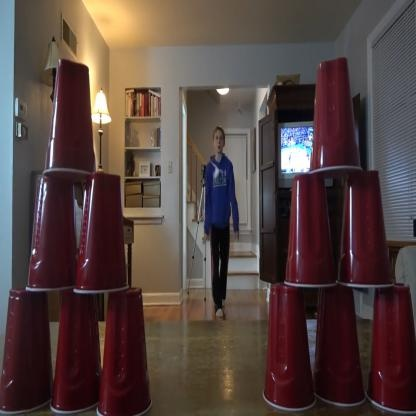

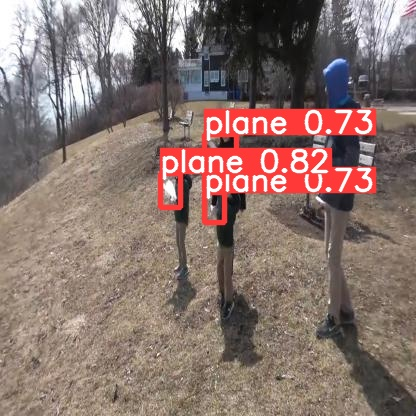

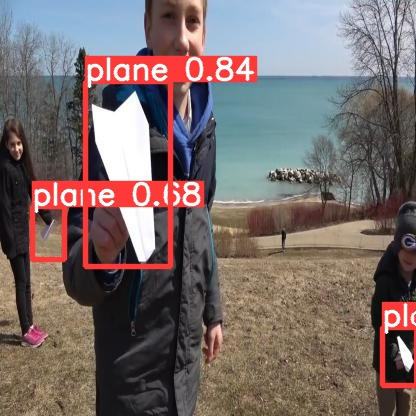

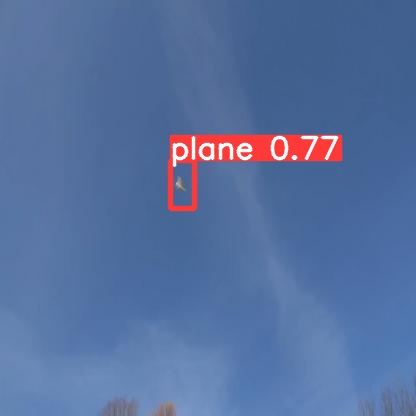

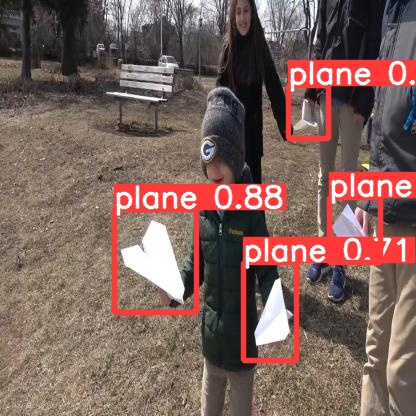

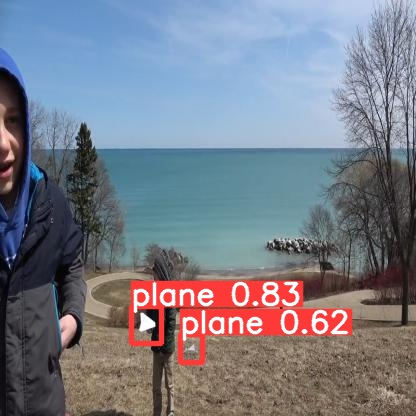

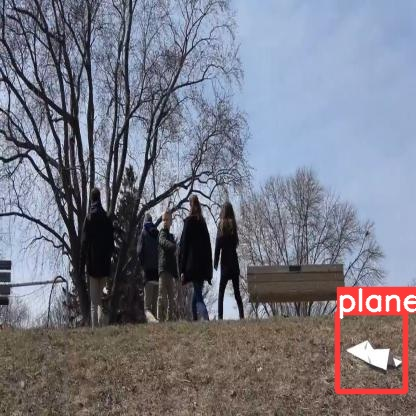

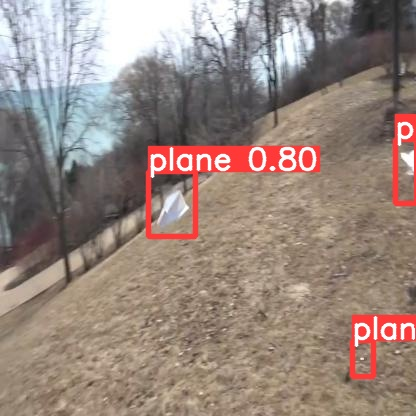

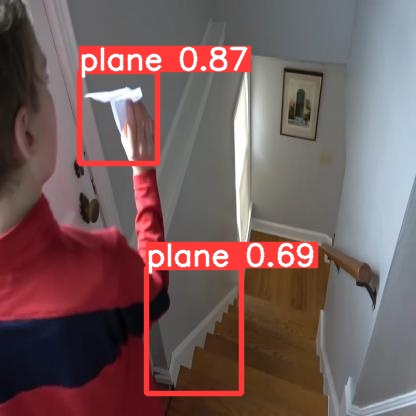

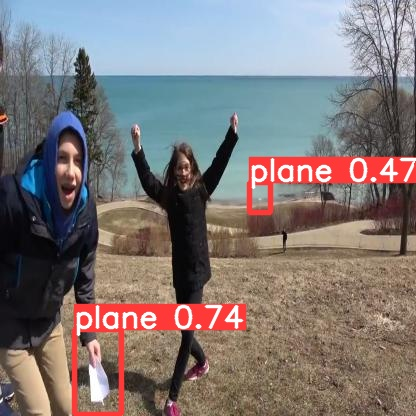

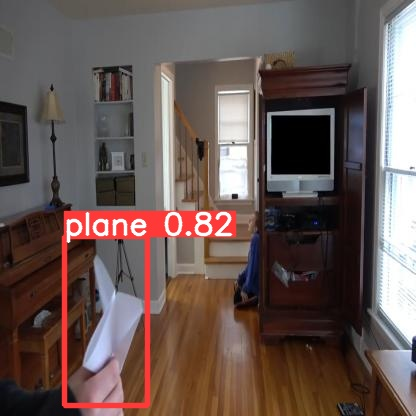

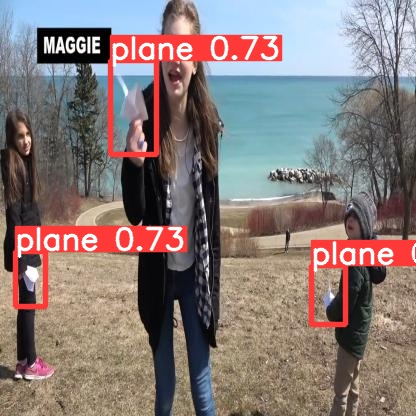

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
# PyTorch Hub
import torch
import os
import cv2

Path = '/content/drive/MyDrive/paperPlateDetection/yolov5/'
# Model
model = torch.hub.load(Path, 'custom', path=os.path.join(Path, 'runs/train/exp2/weights/best.pt'), source='local', force_reload=True)  # local repo
model.conf = 0.3
model.classes = 0
model.cuda()
# Images
dir = "/content/drive/MyDrive/paperPlateDetection/test/images/"
jpgs = os.listdir(dir)
imgs = [cv2.imread(dir+f) for f in jpgs]  # batch of images

# Inference
results = model(imgs, size=640)
results.pandas().xyxy[0]  # im1 predictions (pandas)

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86173414 parameters, 0 gradients
Adding AutoShape... 


xmin        ymin        xmax        ymax  confidence  class   name
0  160.623306  173.627487  180.361755  205.232437    0.814068      0  plane
1  203.518433  134.190811  235.646179  187.236710    0.680146      0  plane
2  204.532410  192.114548  223.635956  221.548111    0.582346      0  plane